In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import re
import matplotlib.pyplot as plt
import string

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd 
df=pd.read_csv('/content/gdrive/MyDrive/Sentiment Analysis from Bangladeshi (Dhaliwood) Movie Reviews/Sentiment Analysis from Bangladeshi (Dhaliwood) Movie Reviews - Sheet1.csv',usecols=[0,1,2])

In [ ]:
df.head()

,Movies Name,Movie Type,Review
0,Aynabazi,Mystery,Just have watched the movie It was just as go...
1,Aynabazi,Mystery,A thousand times better than Shakib Khans shooter
2,Aynabazi,Mystery,very nice movie
3,Aynabazi,Mystery,Someone please give the download link
4,Aynabazi,Mystery,Seriously an extreme movie


In [ ]:
#convert Null/Nun to 0 
df.fillna(0, inplace = True)
df.head
#convert float value to string
df['Review'] = df['Review'].astype(str) 
df.dtypes

Movies Name    object
Movie Type     object
Review         object
dtype: object

In [ ]:
def cleanTxt(df): 
  number=re.sub("[^a-zA-Z]","",str(string))      # Replace all non-letters with spaces
  return df
df['Review'] = df['Review'].apply(cleanTxt)
df                
       

,Movies Name,Movie Type,Review
0,Aynabazi,Mystery,Just have watched the movie It was just as go...
1,Aynabazi,Mystery,A thousand times better than Shakib Khans shooter
2,Aynabazi,Mystery,very nice movie
3,Aynabazi,Mystery,Someone please give the download link
4,Aynabazi,Mystery,Seriously an extreme movie
...,...,...,...
5022,WTFry,Romance,I was very interested to see the first post bu...
5023,WTFry,Romance,False story personal rating
5024,WTFry,Romance,I feel good
5025,WTFry,Romance,Comparison with Three Idiots !!Brother is eati...


In [ ]:
def cleanTxt(df): 
 df = re.sub(r'@[A-Za-z0-9]+', '', df) #Removing mentions
 df = re.sub(r'#[A-Za-z0-9]+', '', df)  #Removing hastags
 df = re.sub(r'RT[\s]+', '', df)   #Removing RTs
 df = re.sub(r'https?:\/\/\S+', '', df) #Removing URLs (generally promotional posts)
 return df
df['Review'] = df['Review'].apply(cleanTxt)
df

In [ ]:
from textblob import TextBlob
#Function for getting subjectivity
def getSubjectivity(Review):
  return TextBlob(Review).sentiment.subjectivity

#Function for getting polarity
def getPolarity(Review):
  return TextBlob(Review).sentiment.polarity

#Creating new columns
df['Subjectivity'] = df['Review'].apply(getSubjectivity)
df['Polarity'] = df['Review'].apply(getPolarity)
df

,Movies Name,Movie Type,Review,Subjectivity,Polarity
0,Aynabazi,Mystery,Just have watched the movie It was just as go...,0.483333,0.083333
1,Aynabazi,Mystery,A thousand times better than Shakib Khans shooter,0.500000,0.500000
2,Aynabazi,Mystery,very nice movie,1.000000,0.780000
3,Aynabazi,Mystery,Someone please give the download link,0.000000,0.000000
4,Aynabazi,Mystery,Seriously an extreme movie,1.000000,-0.125000
...,...,...,...,...,...
5022,WTFry,Romance,I was very interested to see the first post bu...,0.327778,0.191667
5023,WTFry,Romance,False story personal rating,0.450000,-0.200000
5024,WTFry,Romance,I feel good,0.600000,0.700000
5025,WTFry,Romance,Comparison with Three Idiots !!Brother is eati...,0.700000,-0.533333


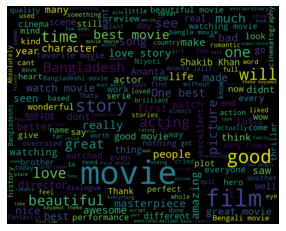

In [ ]:
from wordcloud import WordCloud 
# Plot the Word Cloud
allWords = ' '.join([comnt for comnt in df['Review']])
wordCloud = WordCloud(width =1000, height =800, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Sentiment analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Class'] = df['Polarity'].apply(getAnalysis)

df

,Movies Name,Movie Type,Review,Subjectivity,Polarity,Class
0,Aynabazi,Mystery,Just have watched the movie It was just as go...,0.483333,0.083333,Positive
1,Aynabazi,Mystery,A thousand times better than Shakib Khans shooter,0.500000,0.500000,Positive
2,Aynabazi,Mystery,very nice movie,1.000000,0.780000,Positive
3,Aynabazi,Mystery,Someone please give the download link,0.000000,0.000000,Neutral
4,Aynabazi,Mystery,Seriously an extreme movie,1.000000,-0.125000,Negative
...,...,...,...,...,...,...
5022,WTFry,Romance,I was very interested to see the first post bu...,0.327778,0.191667,Positive
5023,WTFry,Romance,False story personal rating,0.450000,-0.200000,Negative
5024,WTFry,Romance,I feel good,0.600000,0.700000,Positive
5025,WTFry,Romance,Comparison with Three Idiots !!Brother is eati...,0.700000,-0.533333,Negative


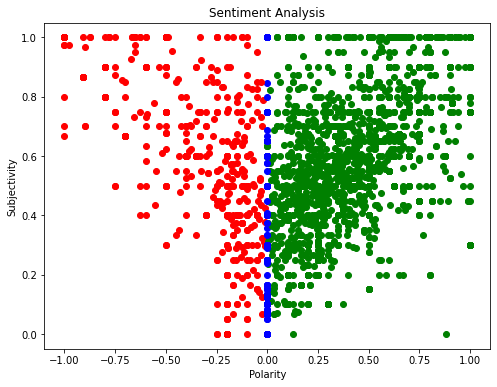

In [ ]:
# Scatter-Plot the polarity and subjectivity in graph
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
	if df['Class'][i]=='Neutral':
 		 plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')
	elif df['Class'][i]=='Positive':
 		 plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Green')
	else:
 		 plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Red')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
# Get the percentage of positive comment
pcomment = df[df.Class == 'Positive']
pcomment = pcomment['Review']
round((pcomment.shape[0]/df.shape[0]*100), 1)

58.8

In [ ]:
# Get the percentage of negative comment
ncomment = df[df.Class == 'Negative']
ncomment = ncomment['Review']
round((ncomment.shape[0]/df.shape[0]*100), 1)

10.8

In [ ]:
# Get the percentage of neutral comment
nucomment = df[df.Class == 'Neutral']
nucomment = nucomment['Review']
round((nucomment.shape[0]/df.shape[0]*100), 1)

30.4

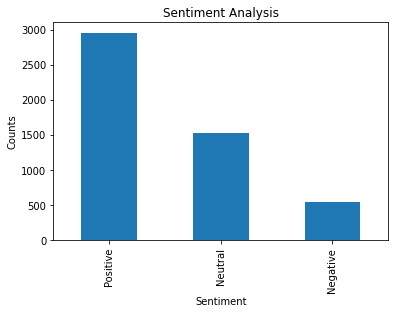

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
# Displaying the Sentiment Coutns
df['Class'].value_counts()
#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Class'].value_counts().plot(kind='bar')

plt.show()

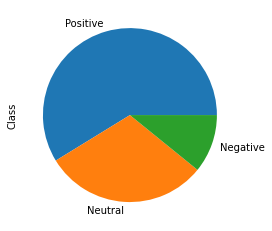

In [ ]:

df['Class'].value_counts().plot(kind='pie')
plt.show()